In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [34]:
# Load the data
data = pd.read_csv("/content/screentime_analysis.csv")

In [35]:
data.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [36]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [37]:
# Basic Data Exploration
print("Data Overview:")
data.head()

Data Overview:


,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [38]:
print("\nData Description:")
data.describe(include='all')


Data Description:


,Date,App,Usage (minutes),Notifications,Times Opened
count,200,200,200.000000,200.000000,200.00000
unique,NaN,8,NaN,NaN,NaN
top,NaN,Instagram,NaN,NaN,NaN
freq,NaN,25,NaN,NaN,NaN
mean,2024-08-16 17:16:48,NaN,37.750000,28.735000,21.63000
min,2024-08-01 00:00:00,NaN,1.000000,0.000000,1.00000
25%,2024-08-09 00:00:00,NaN,17.000000,1.750000,4.00000
50%,2024-08-18 00:00:00,NaN,26.000000,11.500000,10.00000
75%,2024-08-25 00:00:00,NaN,51.250000,47.000000,32.00000
max,2024-08-30 00:00:00,NaN,119.000000,147.000000,99.00000


In [39]:
print("\nData Info:")
data.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ KB


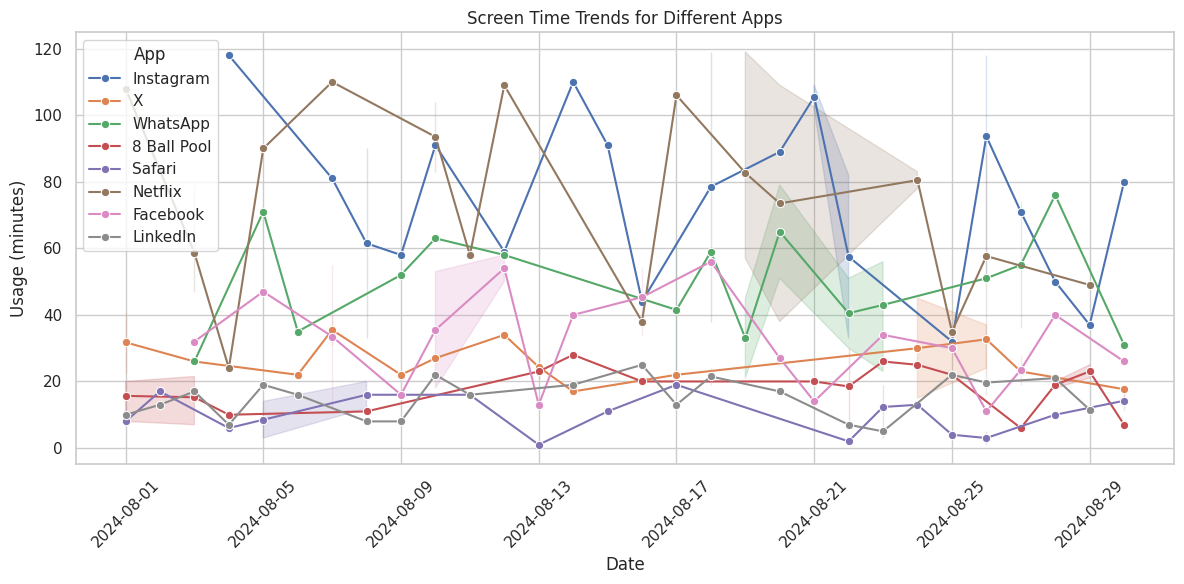

In [40]:
# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# Line plot of screen time trends for different apps
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Usage (minutes)', hue='App', data=data, marker="o")
plt.title('Screen Time Trends for Different Apps')
plt.ylabel('Usage (minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph illustrates the screen time usage of various apps throughout August 2024. Instagram shows the most fluctuating and high usage, peaking around mid-August and August 26. Apps like X, WhatsApp, and Netflix generally show lower and more consistent usage. Safari and 8 Ball Pool also show significant variability, with 8 Ball Pool reaching its highest point around August 11. LinkedIn and Facebook maintain relatively low and stable usage throughout the period. Overall, Instagram dominates screen time, while other apps experience occasional spikes but lower overall engagement.

<Figure size 800x600 with 0 Axes>

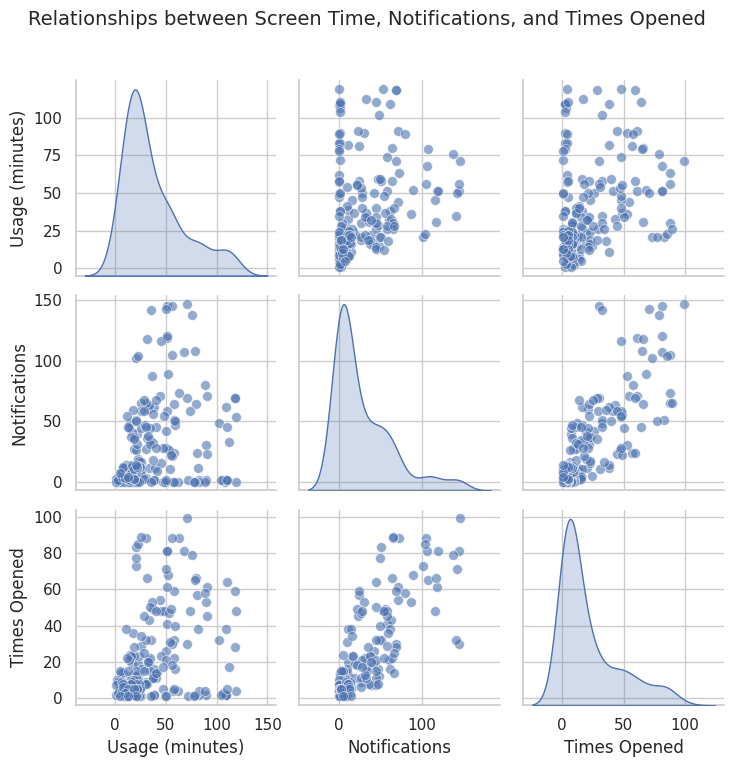

In [41]:
# Pair plot to show relationships between screen time, notifications, and times opened
plt.figure(figsize=(8, 6))
pairplot = sns.pairplot(
    data[['Usage (minutes)', 'Notifications', 'Times Opened']],
    kind="scatter",
    diag_kind="kde",
    plot_kws={'alpha':0.6, 's':50}
)
pairplot.fig.suptitle('Relationships between Screen Time, Notifications, and Times Opened', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [42]:
# Aggregated analysis of app usage
app_analysis = data.groupby('App').agg(
    avg_usage=('Usage (minutes)', 'mean'),
    avg_notifications=('Notifications', 'mean'),
    avg_times_opened=('Times Opened', 'mean')
).reset_index().sort_values(by='avg_usage', ascending=False)

print("\nApp Analysis:")
app_analysis



App Analysis:


,App,avg_usage,avg_notifications,avg_times_opened
2,Instagram,75.92,49.80,41.56
4,Netflix,72.76,0.44,2.56
6,WhatsApp,48.16,99.92,68.24
1,Facebook,33.68,39.72,30.20
7,X,27.00,25.84,13.16
0,8 Ball Pool,18.08,4.52,7.28
3,LinkedIn,15.60,8.92,4.76
5,Safari,10.80,0.72,5.28


<ipython-input-43-910d5c513d11>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")
<ipython-input-43-910d5c513d11>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
<ipython-input-43-910d5c513d11>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=10)


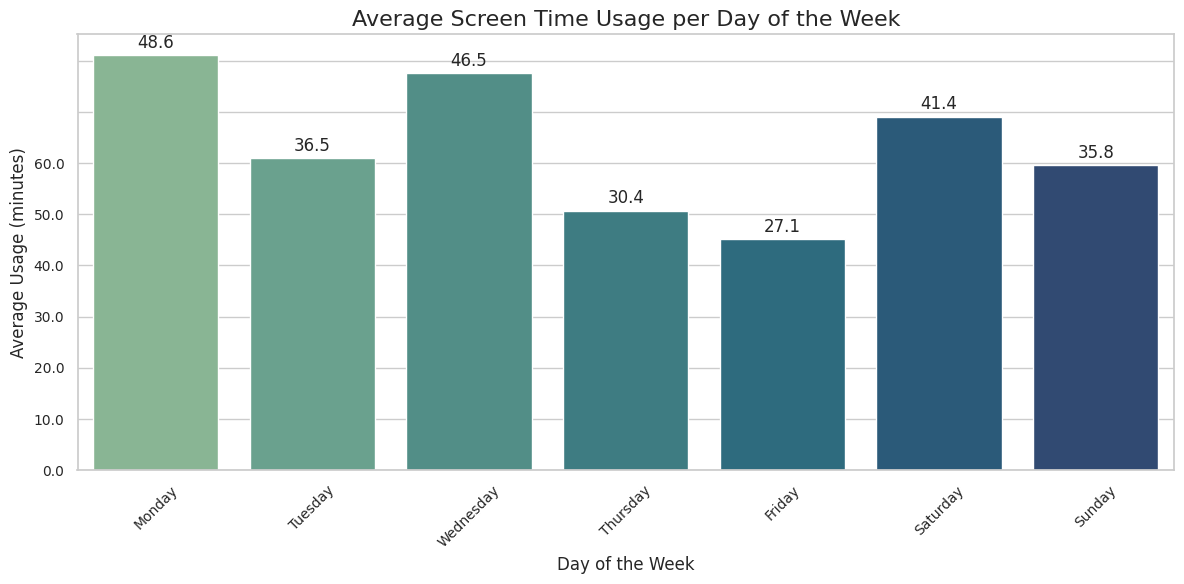

In [43]:
# Add 'Day of Week' to the dataframe
data['Day of Week'] = data['Date'].dt.day_name()

# Weekly usage bar plot
weekly_usage = data.groupby('Day of Week')['Usage (minutes)'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=weekly_usage.index, y=weekly_usage.values, palette="crest")
ax.set_title('Average Screen Time Usage per Day of the Week', fontsize=16)
ax.set_ylabel('Average Usage (minutes)', fontsize=12)
ax.set_xlabel('Day of the Week', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
ax.set_yticklabels(ax.get_yticks(), fontsize=10)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Annotate bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()

The highest usage occurs on Monday (48.6 minutes) and Wednesday (46.5 minutes), which indicates that the beginning and middle of the week see the most screen time. Usage decreases towards the end of the week, with Friday having the lowest average (27.1 minutes). Screen time increases again on Saturday (41.4 minutes) and slightly drops on Sunday (35.8 minutes). This pattern suggests higher screen engagement during workdays and moderate usage over the weekend.



<Figure size 1200x600 with 0 Axes>

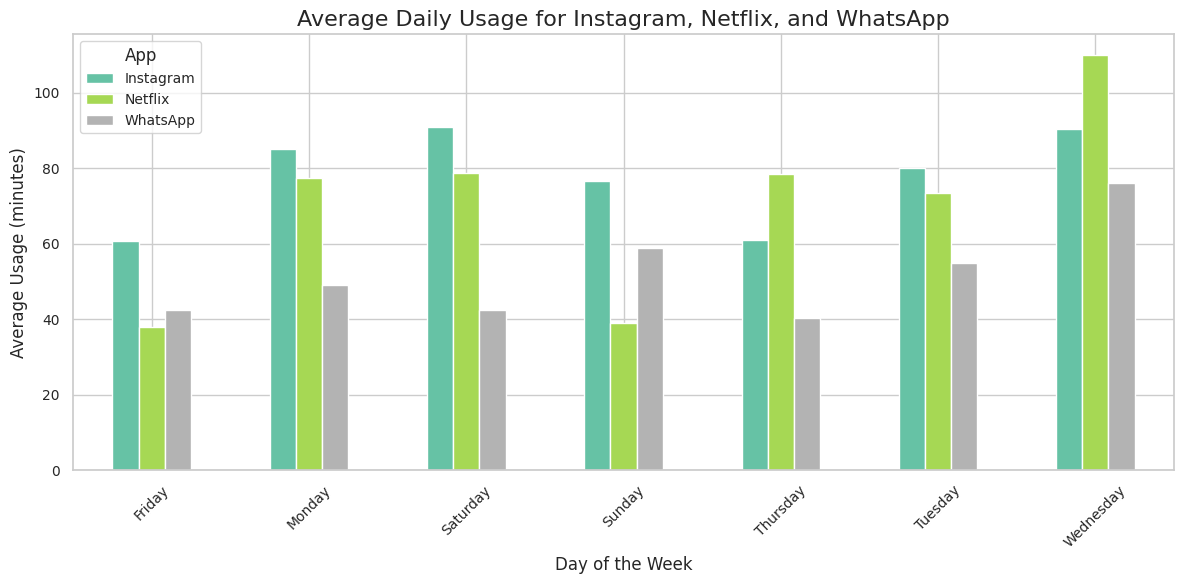

In [45]:
# Daily average usage for top apps
top_apps_data = data[data['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]
daily_app_usage = top_apps_data.groupby(['App', 'Day of Week'])['Usage (minutes)'].mean().unstack().fillna(0).reset_index()

plt.figure(figsize=(12, 6))
daily_app_usage.set_index('App').T.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Average Daily Usage for Instagram, Netflix, and WhatsApp', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='App', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

Instagram consistently has the highest usage, especially on Saturday (91.0 minutes) and Wednesday (90.4 minutes). Netflix usage peaks on Wednesday (110.0 minutes) and Saturday (78.8 minutes), which shows strong mid-week and weekend engagement. WhatsApp usage is generally lower than Instagram and Netflix, with its highest usage on Sunday (59.0 minutes) and Wednesday (76.0 minutes). Overall, Wednesday and Saturday are the days with the highest overall screen time across these three apps.

# **Calculating the Probability of App Openings Through Notifications**

Now, we will calculate the probability of the user opening the app from each notification. To calculate the probability of a user opening each app when there is a notification, we can use the following approach:

* Step 1: Calculate the number of instances where there were notifications (Notifications > 0).
* Step 2: Calculate how often the app was opened on those days (Times Opened > 0).
In this scenario, the probability can be calculated as:

**P(Open|Notification) = Number of days the app was opened when notifications were received​ / Total number of days notifications were received**

I will calculate this for each app in the dataset:

In [47]:
# Analysis of notifications and times opened
notifications_data = data[data['Notifications'] > 0]
app_opened_when_notif = notifications_data.groupby('App').apply(
    lambda x: (x['Times Opened'] > 0).sum() / len(x)
).reset_index(name='Probability of Open with Notification')

print("\nProbability of Opening App with Notification:")
app_opened_when_notif


Probability of Opening App with Notification:


,App,Probability of Open with Notification
0,8 Ball Pool,1.0
1,Facebook,1.0
2,Instagram,1.0
3,LinkedIn,1.0
4,Netflix,1.0
5,Safari,1.0
6,WhatsApp,1.0
7,X,1.0
